In [1]:
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt

import spated

c:\Users\GiovanniAmorim\Pessoal\ProjetoAmbulancias\venv_samu\lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.8.1-CAPI-1.13.3) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


# Limit borders

In [2]:
# initial map used as max borders
max_borders = gpd.read_file(r'data/rio_de_janeiro_fullmap/')
print(type(max_borders))
max_borders

<class 'geopandas.geodataframe.GeoDataFrame'>


,OBJECTID_1,OBJECTID,MUN,SHAPE_LENG,SHAPESTAre,SHAPESTLen,geometry
0,2,None,None,None,1.204148e+09,375647.256369,"MULTIPOLYGON (((682113.651 7469305.612, 682113..."


<AxesSubplot:>

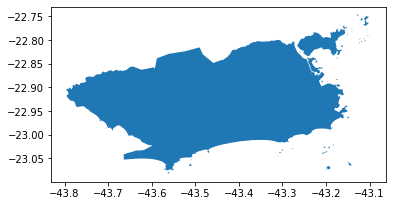

In [3]:
app = spated.DataAggregator(crs='epsg:4326') # epsg:29193
app.add_max_borders(max_borders)

app.max_borders.plot()

# Events data

In [4]:
# events data
events = pd.read_csv(r'data/ambulance_calls.csv', index_col=0)
events.head()

,data_idx,Prioridade,TotalViaturas,latitude,longitude,data,hora,TipoViatura,Coordenadas
0,1/1/16 2:09,3,0,-22.869398,-43.333665,1/1/16,2:09:13,0,POINT (-43.333665 -22.869398)
1,1/1/16 2:13,0,1,-22.876186,-43.675890,1/1/16,2:13:05,1,POINT (-43.67589 -22.876186)
2,1/1/16 2:16,3,0,NaN,NaN,1/1/16,2:16:08,0,POINT (nan nan)
3,1/1/16 2:17,1,1,-22.906627,-43.293335,1/1/16,2:17:06,2,POINT (-43.293335 -22.906627)
4,1/1/16 2:20,3,0,NaN,NaN,1/1/16,2:20:44,0,POINT (nan nan)


In [5]:
app.add_events_data(events.sample(1000), datetime_col='data_idx', lat_col='latitude', lon_col='longitude', feature_cols=['Prioridade'])

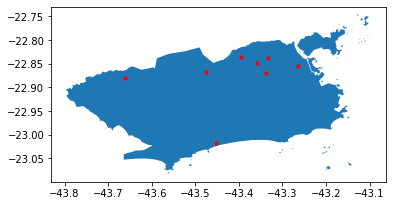

In [6]:
fig, ax = plt.subplots()
app.max_borders.plot(ax=ax)
app.events_data.sample(10).plot(markersize=10, color='red', ax=ax)
plt.show()

## We can also compute max borders based on events data!

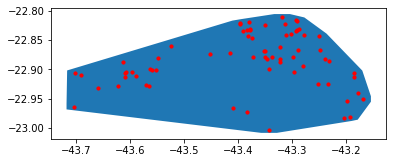

In [7]:
app2 = spated.DataAggregator(crs='epsg:4326')
# first, add events
app2.add_events_data(events.sample(100), datetime_col='data_idx', lat_col='latitude', lon_col='longitude', feature_cols=['Prioridade'])
# then, compute borders with desired method
app2.add_max_borders(method="convex")

fig, ax = plt.subplots()
app2.max_borders.plot(ax=ax)
app2.events_data.plot(markersize=10, color='red', ax=ax)
plt.show()

# Time discretization

## Basic Seasonality

In [8]:
# 7 days in a week
app.add_time_discretization('D', 1, 7)

# 48 30-minute slots in a day
app.add_time_discretization('m', 30, 60*24)

## Variable Window Time Discretization

In [9]:
app.add_time_discretization('M', [3,4,2,1,2], 12)

## Custom Time Discretization

In [10]:
time_disc_df = pd.DataFrame([
    ["2016-01-01", "2016-01-01", 1, "yearly"],
    ["2016-02-06", "2016-02-11", 2, None],
    ["2017-02-24", "2017-03-06", 2, None],
], columns=["start", "end", "t", "repetition"])

time_disc_df

,start,end,t,repetition
0,2016-01-01,2016-01-01,1,yearly
1,2016-02-06,2016-02-11,2,None
2,2017-02-24,2017-03-06,2,None


In [11]:
app.add_time_discretization(time_disc_df)

All time discretizations are represented as columns in the events dataset.

In [12]:
app.events_data.head(10)

,Prioridade,geometry,ts,tdiscr_1,tdiscr_2,tdiscr_3,tdiscr_4
69,1,POINT (-43.38059 -23.01140),2016-01-01 04:27:00,0,8,0,1
1224,1,POINT EMPTY,2016-01-02 16:29:00,1,32,0,0
1690,3,POINT (-43.69851 -22.96921),2016-01-03 11:59:00,2,23,0,0
3048,1,POINT (-43.38169 -22.83303),2016-01-05 14:20:00,4,28,0,0
3459,1,POINT EMPTY,2016-01-06 05:02:00,5,10,0,0
3907,3,POINT (-43.22624 -22.88567),2016-01-06 20:48:00,5,41,0,0
4122,1,POINT EMPTY,2016-01-07 07:37:00,6,15,0,0
4342,1,POINT (-43.33308 -22.86541),2016-01-07 15:09:00,6,30,0,0
4500,1,POINT EMPTY,2016-01-07 19:17:00,6,38,0,0
4579,3,POINT EMPTY,2016-01-07 21:15:00,6,42,0,0


# Geographical discretization

## Rectangular

In [13]:
app.add_geo_discretization(
    discr_type='R',
    rect_discr_param_x=10,
    rect_discr_param_y=10
)
app.geo_discretization.head()

c:\Users\GiovanniAmorim\Pessoal\ProjetoAmbulancias\venv_samu\lib\site-packages\IPython\core\interactiveshell.py:3441: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,neighbors,geometry,center_lat,center_lon
0,0,"[1, 6, 7]","POLYGON ((-43.65577 -23.04922, -43.65577 -23.0...",-4.854787e+06,-2.563147e+06
1,1,"[2, 0, 7, 8, 6]","POLYGON ((-43.65577 -23.04922, -43.58591 -23.0...",-4.850095e+06,-2.563099e+06
2,2,"[3, 1, 8, 9, 7]","MULTIPOLYGON (((-43.58591 -23.04922, -43.52824...",-4.843597e+06,-2.564048e+06
3,3,"[2, 9, 10, 8]","MULTIPOLYGON (((-43.50821 -23.05262, -43.50817...",-4.838224e+06,-2.564492e+06
4,4,"[5, 13, 12]","MULTIPOLYGON (((-43.19084 -23.07200, -43.19109...",-4.803046e+06,-2.565305e+06


In [14]:
app.geo_discretization["center"] = app.geo_discretization.geometry.to_crs("epsg:29193").centroid.to_crs(app.geo_discretization.crs)
app.geo_discretization["coords"] = app.geo_discretization["center"].apply(lambda x: x.representative_point().coords[:][0])

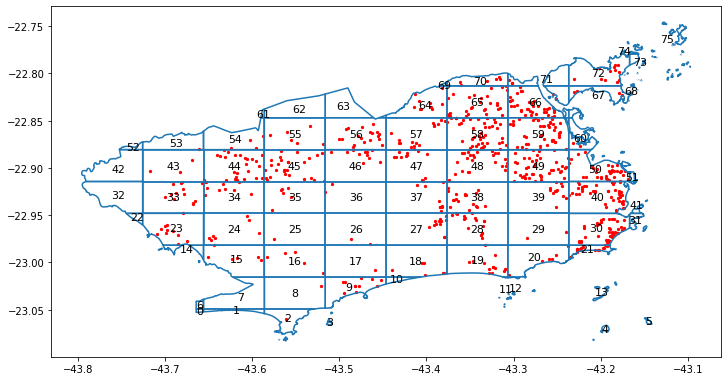

In [15]:
fig, ax = plt.subplots(figsize=(12, 8))
app.geo_discretization.boundary.plot(ax=ax)
app.events_data.sample(1000).dropna(subset=['gdiscr']).plot(markersize=5, color='red', ax=ax)
for _, row in app.geo_discretization.iterrows():
    plt.annotate(
        text=row["id"],
        xy=row['coords'],
        horizontalalignment="center",
        verticalalignment="center",
        color='black', fontsize=11
    )

## Hexagonal

In [16]:
app.add_geo_discretization(
    discr_type='H',
    hex_discr_param=7
)
app.geo_discretization.head()

c:\Users\GiovanniAmorim\Pessoal\ProjetoAmbulancias\venv_samu\lib\site-packages\IPython\core\interactiveshell.py:3441: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,neighbors,geometry,center_lat,center_lon
0,0,"[160, 57, 167, 183, 50, 94]","POLYGON ((-43.27467 -22.90000, -43.26776 -22.9...",-4.812755e+06,-2.547553e+06
1,1,"[207, 42, 214, 181, 191, 225]","POLYGON ((-43.51090 -22.88314, -43.50400 -22.8...",-4.839023e+06,-2.545677e+06
2,2,"[145, 83, 101, 219, 16, 142]","POLYGON ((-43.35481 -22.95229, -43.34048 -22.9...",-4.820073e+06,-2.553407e+06
3,3,"[193, 188, 100, 195, 21, 175]","POLYGON ((-43.35220 -22.84375, -43.35910 -22.8...",-4.819724e+06,-2.538924e+06
4,4,"[78, 211, 150, 79, 152, 192]","POLYGON ((-43.27675 -22.98679, -43.29109 -22.9...",-4.812929e+06,-2.554791e+06


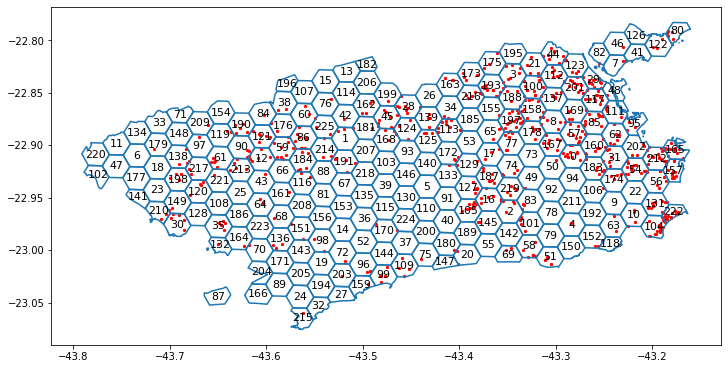

In [17]:
centers = app.geo_discretization.geometry.to_crs("epsg:29193").centroid.to_crs(app.geo_discretization.crs)
coords = centers.apply(lambda x: x.representative_point().coords[:][0])

fig, ax = plt.subplots(figsize=(12, 8))
app.geo_discretization.boundary.plot(ax=ax)
app.events_data.sample(1000).dropna(subset=['gdiscr']).plot(markersize=5, color='red', ax=ax)
for ind, row in app.geo_discretization.iterrows():
    plt.annotate(
        text=row["id"],
        xy=coords.loc[ind],
        horizontalalignment="center",
        verticalalignment="center",
        color='black', fontsize=11
    )


## Custom from graph (doesn't support regressors)

In [18]:
# read nodes data
f = open(r'data/street_nodes.txt', "r")
nodes = pd.DataFrame([r.strip().split(" ") for r in f.readlines()], columns=["id", "lat", "lon"])

nodes["id"] = nodes["id"].astype(int)
nodes["lat"] = nodes["lat"].astype(float)
nodes["lon"] = nodes["lon"].astype(float)

# transform to geodataframe
nodes = gpd.GeoDataFrame(
    nodes, 
    geometry=gpd.points_from_xy(nodes.lon, nodes.lat)
).set_crs(app.crs).sample(100)

In [19]:
nodes

,id,lat,lon,geometry
218804,218805,-22.9743,-43.2074,POINT (-43.20740 -22.97430)
183831,183832,-22.8103,-43.2260,POINT (-43.22600 -22.81030)
267806,267808,-22.8492,-43.4776,POINT (-43.47760 -22.84920)
105660,105661,-22.9625,-43.5848,POINT (-43.58480 -22.96250)
249290,249292,-22.8456,-43.5287,POINT (-43.52870 -22.84560)
...,...,...,...,...
54816,54817,-22.8265,-43.3673,POINT (-43.36730 -22.82650)
185123,185124,-22.9941,-43.2364,POINT (-43.23640 -22.99410)
222155,222156,-22.9189,-43.2042,POINT (-43.20420 -22.91890)
113050,113051,-22.9908,-43.3969,POINT (-43.39690 -22.99080)


In [20]:
app.add_geo_discretization('G', custom_data=nodes)
app.geo_discretization.head()

c:\Users\GiovanniAmorim\Pessoal\ProjetoAmbulancias\venv_samu\lib\site-packages\pygeos\predicates.py:906: RuntimeWarning: invalid value encountered in within
  return lib.within(a, b, **kwargs)


,geometry,id
218804,POINT (-43.20740 -22.97430),0
183831,POINT (-43.22600 -22.81030),1
267806,POINT (-43.47760 -22.84920),2
105660,POINT (-43.58480 -22.96250),3
249290,POINT (-43.52870 -22.84560),4


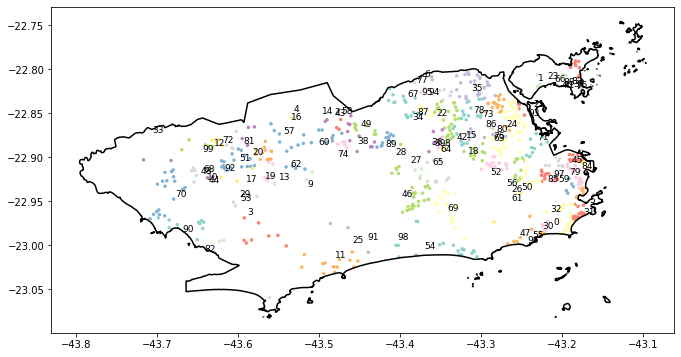

In [21]:
centers = app.geo_discretization.geometry.to_crs("epsg:29193").centroid.to_crs(app.geo_discretization.crs)
coords = centers.apply(lambda x: x.representative_point().coords[:][0])

fig, ax = plt.subplots(figsize=(12, 6))
app.max_borders.boundary.plot(ax=ax, color="black")
app.events_data.dropna(subset=['gdiscr']).plot(markersize=6, column='gdiscr', ax=ax, cmap="Set3")

for ind, row in app.geo_discretization.iterrows():
    plt.annotate(
        text=row["id"],
        xy=coords.loc[ind],
        horizontalalignment="center",
        verticalalignment="center",
        color='black', fontsize=9
    )
plt.show()

## Custom from map

In [22]:
# custom map
custom_map = gpd.read_file(r'data/rio_de_janeiro_neighborhoods')
print(type(custom_map))
custom_map = custom_map.set_crs('epsg:29193')
custom_map.head()

<class 'geopandas.geodataframe.GeoDataFrame'>


,Área,NOME,REGIAO_ADM,AREA_PLANE,CODBAIRRO,CODRA,CODBNUM,LINK,area,len,geometry
0,1.705684e+06,Paquetá,PAQUETA,1,13,21,13,Paquetá&area=13,1.705684e+06,24841.426123,"MULTIPOLYGON (((694555.510 7483079.800, 694554..."
1,4.056403e+06,Freguesia,ILHA DO GOVERNADOR,3,98,20,98,Freguesia&area=98,4.056403e+06,18303.596291,"MULTIPOLYGON (((687736.110 7480093.850, 687735..."
2,9.780466e+05,Bancários,ILHA DO GOVERNADOR,3,97,20,97,Bancários&area=97,9.780466e+05,7758.781330,"MULTIPOLYGON (((685934.980 7479388.550, 685937..."
3,1.895742e+07,Galeão,ILHA DO GOVERNADOR,3,104,20,104,Galeão&area=104,1.895742e+07,21510.058418,"MULTIPOLYGON (((681940.940 7479375.300, 681947..."
4,1.672546e+06,Tauá,ILHA DO GOVERNADOR,3,101,20,101,Tauá&area=101,1.672546e+06,8246.109606,"POLYGON ((686812.130 7477581.700, 686796.080 7..."


In [23]:
app.add_geo_discretization('C', custom_data=custom_map)
app.geo_discretization.head()

c:\Users\GiovanniAmorim\Pessoal\ProjetoAmbulancias\venv_samu\lib\site-packages\IPython\core\interactiveshell.py:3441: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


,geometry,id,neighbors,center_lat,center_lon
0,"MULTIPOLYGON (((-43.10572 -22.74889, -43.10573...",0,[],-4.793761e+06,-2.531271e+06
1,"MULTIPOLYGON (((-43.17175 -22.77662, -43.17175...",1,[2],-4.800155e+06,-2.533544e+06
2,"MULTIPOLYGON (((-43.18920 -22.78319, -43.18918...",2,"[1, 4, 9]",-4.801518e+06,-2.534409e+06
3,"MULTIPOLYGON (((-43.22809 -22.78375, -43.22803...",3,"[5, 14]",-4.807678e+06,-2.536117e+06
4,"POLYGON ((-43.18044 -22.79941, -43.18060 -22.7...",4,"[2, 6, 9, 11]",-4.802147e+06,-2.534993e+06


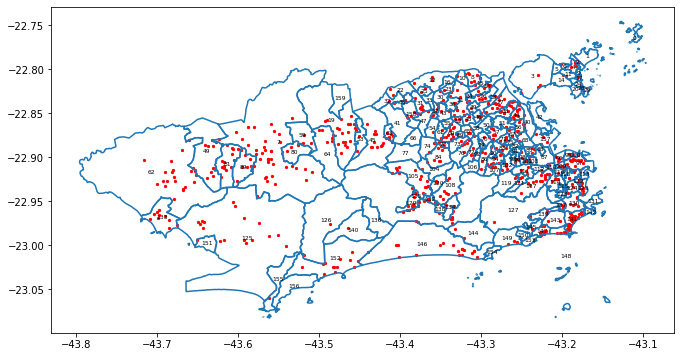

In [24]:
centers = app.geo_discretization.geometry.to_crs("epsg:29193").centroid.to_crs(app.geo_discretization.crs)
coords = centers.apply(lambda x: x.representative_point().coords[:][0])

fig, ax = plt.subplots(figsize=(12, 6))
app.geo_discretization.boundary.plot(ax=ax)
app.events_data.sample(1000).dropna(subset=['gdiscr']).plot(markersize=5, color='red', ax=ax)

for ind, row in app.geo_discretization.iterrows():
    plt.annotate(
        text=row["id"],
        xy=coords.loc[ind],
        horizontalalignment="center",
        verticalalignment="center",
        color='black', fontsize=6
    )

# Add geo located regressors

## Population

In [25]:
population = gpd.read_file(r'data/rio_de_janeiro_population/')
population = population[['Pop1','Pop2','Pop3','Pop4','geometry']].copy()
population.head()

,Pop1,Pop2,Pop3,Pop4,geometry
0,1278.0,1240.0,2648.0,1556.0,"MULTIPOLYGON (((694555.510 7483079.800, 694554..."
1,13692.0,14914.0,31346.0,10559.0,"MULTIPOLYGON (((687736.110 7480093.850, 687735..."
2,2598.0,2903.0,5298.0,1713.0,"MULTIPOLYGON (((685934.980 7479388.550, 685937..."
3,6205.0,5608.0,9468.0,1690.0,"MULTIPOLYGON (((681940.940 7479375.300, 681947..."
4,6700.0,6862.0,12185.0,3820.0,"POLYGON ((686812.130 7477581.700, 686796.080 7..."


<AxesSubplot:>

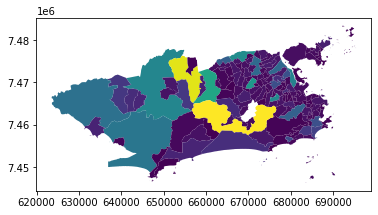

In [26]:
population.plot(column='Pop1')

In [27]:
app.add_geo_variable(population)

<AxesSubplot:>

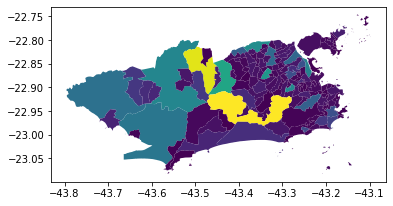

In [28]:
app.geo_discretization.plot(column='Pop1')

## Land Type

In [29]:
land_types = gpd.read_file(r'data/rio_de_janeiro_soil_use').set_crs("epsg:29193")
land_types.head()

,soil_use_1,soil_use_2,soil_use_0,soil_use_3,soil_use_4,geometry
0,98.857177,0.000000,0.000000,0.000000,0.000000,"MULTIPOLYGON (((684095.357 7464877.444, 684068..."
1,0.000000,29.627349,0.000000,0.000000,0.000000,"MULTIPOLYGON (((649675.493 7456639.603, 649597..."
2,0.000000,0.000000,651.971679,0.000000,0.000000,"MULTIPOLYGON (((670118.438 7455959.018, 670112..."
3,0.000000,0.000000,0.000000,376.848985,0.000000,"MULTIPOLYGON (((651246.985 7462606.664, 651268..."
4,0.000000,0.000000,0.000000,0.000000,46.861331,"MULTIPOLYGON (((653675.992 7452638.115, 653688..."


No handles with labels found to put in legend.


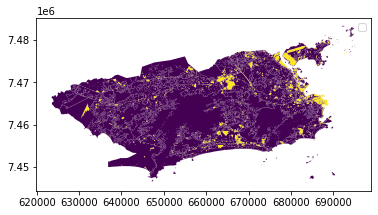

In [30]:
land_types.plot(column="soil_use_1")
plt.legend()
plt.show()

In [31]:
app.add_geo_variable(land_types)

<AxesSubplot:>

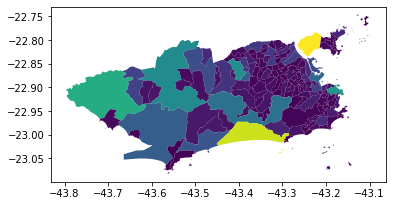

In [32]:
app.geo_discretization.plot(column='soil_use_1')

# Final Data Structure

In [33]:
app.events_features, app.geo_features, app.time_indexes, app.geo_index

(['Prioridade'],
 ['Pop1',
  'Pop2',
  'Pop3',
  'Pop4',
  'soil_use_1',
  'soil_use_2',
  'soil_use_0',
  'soil_use_3',
  'soil_use_4'],
 ['tdiscr_1', 'tdiscr_2', 'tdiscr_3', 'tdiscr_4'],
 'gdiscr')

In [34]:
app.events_data

,Prioridade,geometry,ts,tdiscr_1,tdiscr_2,tdiscr_3,tdiscr_4,gdiscr
index,,,,,,,,
69,1,POINT (-43.38059 -23.01140),2016-01-01 04:27:00,0,8,0,1,146.0
1224,1,POINT EMPTY,2016-01-02 16:29:00,1,32,0,0,NaN
1690,3,POINT (-43.69851 -22.96921),2016-01-03 11:59:00,2,23,0,0,133.0
3048,1,POINT (-43.38169 -22.83303),2016-01-05 14:20:00,4,28,0,0,31.0
3459,1,POINT EMPTY,2016-01-06 05:02:00,5,10,0,0,NaN
...,...,...,...,...,...,...,...,...
397208,2,POINT (-43.38156 -22.94048),2017-12-29 04:55:00,0,9,4,0,129.0
397270,3,POINT (-43.60901 -22.91178),2017-12-29 10:10:00,0,20,4,0,81.0
397464,1,POINT (-43.33219 -22.85715),2017-12-29 16:38:00,0,33,4,0,52.0
